## Operating Performance - Airport Commercial Indicators
### Project Introduction to Data Science - CAP 394 INPE - Lenice Mirian
#### Satisfaction Survey (Source: SAC - Civil Aviation Secretariat)

#### Define libraries

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import bokeh

#### The data has been downloaded and saved to a local folder where it can be obtained from: https://horus.labtrans.ufsc.br/gerencial/#DesempenhoOperacional/ResultadosGerais
#### Data download in July 31, 2019
#### Last page refesh in March 31, 2019
#### Collection Period: May 29, 2013 to March 30, 2019
#### All Search Airports (21 airports)
####  Airport Commercial Indicators

#### In Brazil, a permanent survey is carried out by the Civil Aviation Secretariat - SAC (2019), with the purpose of measuring the satisfaction of the passengers of the 20 main Brazilian airports. The evaluated criteria include check-in, migratory and customs control, security inspection, commercial facilities, airport environment, boarding and landing services. The results contribute to identify challenges, improve competitiveness and reveal the evolution of the terminals evaluated.

#### Import CSV file

In [2]:
import csv

df = pd.read_csv("Data\\dados.csv", sep=';') 
df

C:\Users\lemir\.conda\envs\testefuzzy\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,76,77,79,82,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


#### Creating a list from a dataframe

In [3]:
dados=list(df)
print(dados)

['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto', 'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo', 'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado', 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio', 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca', 'CordialidadeDosFuncionariosDaInspecaoDeSeguranca', 'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo', 'DistanciaCaminhadaNoTerminalDePassageiros', 'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas', 'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios', 'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque', 'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAeroporto', 'ConfortoNaSalaDeEmbarque', 'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'Info

## DATABASE QUESTIONS
#### 1 - Which airports have data for analysis?
#### 2 - What is the profile of the passengers who answered the surveys regarding commercial indicators?
#### 3 - What% did you consume in relation to the total sample for the analyzed period?
#### 4 - What is the scale used in the survey?
#### 5 - What is the profile of the passengers they have consumed (commercial indicators)?
#### 6 - How satisfied are passengers by airport and by indicator analyzed?
#### 7 - What is the metric used to check passenger satisfaction?

In [4]:
for linha in dados[0:]:
    print (linha)

Linha
IcaoAerodromo
NomeAerodromo
Processo
SiglaAeroporto
Terminal
DataDaColeta
MesDaColeta
HorarioDoInicioDaColeta
HorarioDoFimDaColeta
CiaAerea
NumeroDoVoo
TipoDeVoo
Conexao
FormaDeCheckin
TipoDeTransporteParaOAeroporto
MeioDeTransportePublicoUtilizado
OutroMeioDeTransportePublicoUtilizado
DisponibilidadeDeCarrinhosDeBagagem
DisponibilidadeDeMeioFio
TempoDeFilaNaInspecaoDeSegurança
RigorNaInspecaoDeSeguranca
CordialidadeDosFuncionariosDaInspecaoDeSeguranca
FacilidadeDeEncontrarOCaminhoNoAeroporto
PaineisDeInformacaoDeVoo
DistanciaCaminhadaNoTerminalDePassageiros
CordialidadeDosFuncionariosDoAeroporto
DisponibilidadeDeTomadas
QualidadeDaInternetWiFi
DisponibilidadeDeSanitarios
LimpezaDosSanitarios
DisponibilidadeDeAssentosNaSalaDeEmbarque
SensacaoDeProtecaoESeguranca
LimpezaGeralDoAeroporto
ConfortoNaSalaDeEmbarque
ConfortoTermicoDoAeroporto
ConfortoAcusticoDoAeroporto
InformacaoNasEsteirasDeRestituicaoDeBagagem
InstalacoesDeEstacionamentoDeVeiculos
CustoDoEstacionamento
QuantidadeEQu

In [5]:
# Show the first ten lines, or n = number of lines to display:
df.head(n=10)

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


In [6]:
# Displays by default the last 5 rows of the DataFrame:
df.tail()

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431843,431844,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:04,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


In [7]:
# Description of Index
df.index

RangeIndex(start=0, stop=431844, step=1)

### Define which variables will be used in this search

### Airport Data:  
#### IcaoAerodromo / NomeAerodromo / Processo / Terminal / DataDaColeta / CiaAerea / NumeroDoVoo / TipoDeVoo / Conexao

### Commercial Indicators:
#### QuantidadeEQualidadeDeLanchonetesRestaurantes / ValorDosProdutosDeLanchonetesRestaurantes / TempoDeFilaNasLanchonetesRestaurantes / CordialidadeDosFuncionariosDeLanchonetesRestaurantes / QuantidadeEQualidadeDeEstabelecimentosComerciais / ValorDosProdutosComerciais / TempoDeFilaNosEstabelecimentosComerciais / CordialidadeDosFuncionariosDoComercio

### Passenger Profile:
#### NacionalidadeDoEntrevistado / GeneroDoEntrevistado / Escolaridade / ProfissaoDoEntrevistado / RendaDoEntrevistado / ViajandoSozinho / NumeroDeAcompanhantes / MotivoDaViagem / OutrosMotivosDeViagem / QuantDeViagensPartindoDesseAeroporto / FrequenciaDeViagem / TempoDeAntecedenciaDeChegadaParaOVoo / TempoDeEsperaEntreOsVoos

In [8]:
#Removing Columns
newdf = df.drop(['FormaDeCheckin','SiglaAeroporto', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'Linha',
                 'HorarioDoFimDaColeta', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado',
                 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio',
                 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca','CordialidadeDosFuncionariosDaInspecaoDeSeguranca',
                'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo','DistanciaCaminhadaNoTerminalDePassageiros',
                 'CordialidadeDosFuncionariosDoAeroporto','DisponibilidadeDeTomadas','QualidadeDaInternetWiFi','DisponibilidadeDeSanitarios',
                'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque','SensacaoDeProtecaoESeguranca','LimpezaGeralDoAeroporto', 
                 'DataAtualizacao', 'InformacaoNasEsteirasDeRestituicaoDeBagagem', 'InstalacoesDeEstacionamentoDeVeiculos', 
                 'CustoDoEstacionamento', 'DisponibilidadeDeBancosCaixasEletronicosCasasDeCambio',  'QualidadeSalaVip',
                 'TempoDeFilaNoCheckinAutoatendimento', 'TempoDeFilaNoCheckinGuiche','EficienciaDosFuncionariosDoCheckin',
                 'CordialidadeDosFuncionariosDoCheckin','FacilidadeParaRealizarConexoes', 'VelocidadeDaRestituicaoDeBagagem', 
                 'IntegridadeDaBagagem', 'TempoDeFilaNaEmigracao','CordialidadeDosFuncionariosDaEmigracao', 'TempoDeFilaNaImigracao',
                 'CordialidadeDosFuncionariosDaImigracao', 'TempoDeFilaDaAduana', 'CordialidadeDoFuncionarioDaAduana', 'TransportePublico',
                 'DisponibilidadeDeTaxi', 'SatisfacaoGeralDoAeroporto','ConfiabilidadeDaInspecaoDeSeguranca',
                 'DisponibilidadeDeVagasNoEstacionamentoDeVeiculos','QualidadeDaInformacaoPrestadaPelaCiaAerea',
                 'QualidadeDaAcessibilidadeDoAeroporto','DisponibilidadeDeVagasReservadasNoEstacionamento',
                 'DisponibilidadeDeAssentosReservadosParaPessoasComCadeiraDeRodas','QualidadeDoMetodoDeDesembarque', 'Conexao', 'NumeroDoVoo', 'ConfortoNaSalaDeEmbarque',
       'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'PossuiDeficiencia', 'SolicitouAssistenciaEspecial', 'MetodoDeDesembarqueUtilizado', 'TempoDeEsperaEntreOsVoos'], axis=1)
newdf.columns 

Index(['IcaoAerodromo', 'NomeAerodromo', 'Processo', 'Terminal',
       'DataDaColeta', 'CiaAerea', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'GeneroDoEntrevistado', 'Escolaridade', 'ProfissaoDoEntrevistado',
       'RendaDoEntrevistado', 'ViajandoSozinho', 'NumeroDeAcompanhantes',
       'MotivoDaViagem', 'OutrosMotivosDeViagem',
       'QuantDeViagensPartindoDesseAeroporto', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo'],
      dtype='object')

In [9]:
newdf.dtypes

IcaoAerodromo                                            object
NomeAerodromo                                            object
Processo                                                 object
Terminal                                                  int64
DataDaColeta                                             object
CiaAerea                                                 object
TipoDeVoo                                                object
QuantidadeEQualidadeDeLanchonetesRestaurantes           float64
ValorDosProdutosDeLanchonetesRestaurantes               float64
TempoDeFilaNasLanchonetesRestaurantes                   float64
CordialidadeDosFuncionariosDeLanchonetesRestaurantes    float64
QuantidadeEQualidadeDeEstabelecimentosComerciais        float64
ValorDosProdutosComerciais                              float64
TempoDeFilaNosEstabelecimentosComerciais                float64
CordialidadeDosFuncionariosDoComercio                   float64
NacionalidadeDoEntrevistado             

In [10]:
#resumo das variáveis numéricas
newdf.describe()

,Terminal,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,TempoDeFilaNosEstabelecimentosComerciais,CordialidadeDosFuncionariosDoComercio
count,431844.000000,217724.000000,213228.000000,57328.000000,56889.000000,155514.000000,142246.000000,37987.000000,38358.000000
mean,1.363175,3.492569,2.442479,3.613435,3.831022,3.517941,2.618850,3.766973,3.891600
std,0.722714,1.133005,1.196581,1.042123,0.969354,1.102020,1.207922,0.914948,0.898755
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,1.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando MotivoDaViagem:
print('Before Coding:')
print(pd.value_counts(newdf["MotivoDaViagem"]))
newdf["MotivoDaViagem_Coded"] = coding(newdf["MotivoDaViagem"], {'Outros': 'OUTRO','Outro': 'OUTRO',' Outro ': 'OUTRO','Lazer': 'LAZER','lazer':'LAZER',' Lazer ':'LAZER','Negócio':'NEGOCIO',' Negócio ':'NEGOCIO','Lazer e Negócio': 'LAZER & NEGOCIO',' Lazer e Negócio ': 'LAZER & NEGOCIO','Lazer e Negócio ': 'LAZER & NEGOCIO','Lazer e negócio':'LAZER & NEGOCIO'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["MotivoDaViagem_Coded"]))
temp3 = pd.value_counts(newdf["MotivoDaViagem_Coded"])

Before Coding:
Lazer                185462
Negócio               94933
Outro                 19613
Lazer e Negócio        5778
 Lazer                 1946
 Negócio                591
 Lazer e Negócio        138
Lazer e Negócio         106
 Outro                  105
Lazer e negócio          22
Outros                    1
lazer                     1
Name: MotivoDaViagem, dtype: int64

After Coding:
LAZER              187409
NEGOCIO             95524
OUTRO               19719
LAZER & NEGOCIO      6044
Name: MotivoDaViagem_Coded, dtype: int64


In [12]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando TempoDeAntecedenciaDeChegadaParaOVoo:
print('Before Coding:')
print(pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo"]))
newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"] = coding(newdf["TempoDeAntecedenciaDeChegadaParaOVoo"], {'1h a 1h e 30min':'1h até 1h30min','01h01min até 01h30min':'1h até 1h30min', '2h e 30min a 3h':'2h30min até 3h', '02h31min até 03h00min':'2h30min até 3h', 'Mais de 03h01min':'Mais de 3h', 'Mais de 03h01min ': 'Mais de 3h','30min a 1h':'30min até 1h','00h30min até 01h00min': '30min até 1h','2h a 2h e 30min': '2h até 2h30min','02h01min até 02h30min': '2h até 2h30min','1h e 30min a 2h': '1h30min até 2h','01h31min até 02h00min ': '1h30min até 2h','01h31min até 02h00min': '1h30min até 2h'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"]))
temp2 = pd.value_counts(newdf["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"])

Before Coding:
1h a 1h e 30min           34712
Mais de 3h                33737
1h e 30min a 2h           31845
2h a 2h e 30min           24552
2h e 30min a 3h           23771
02h31min até 03h00min     20271
01h01min até 01h30min     19569
Mais de 03h01min          17310
30min a 1h                17205
00h30min até 01h00min     16825
Mais de 03h01min          16253
02h01min até 02h30min     14545
01h31min até 02h00min     13924
01h31min até 02h00min     11829
Name: TempoDeAntecedenciaDeChegadaParaOVoo, dtype: int64

After Coding:
Mais de 3h        67300
1h30min até 2h    57598
1h até 1h30min    54281
2h30min até 3h    44042
2h até 2h30min    39097
30min até 1h      34030
Name: TempoDeAntecedenciaDeChegadaParaOVoo_Coded, dtype: int64


In [13]:
#Define uma função genérica usando a função replace
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Codificando TempoDeAntecedenciaDeChegadaParaOVoo:
print('Before Coding:')
print(pd.value_counts(newdf["GeneroDoEntrevistado"]))
newdf["GeneroDoEntrevistado_Coded"] = coding(newdf["GeneroDoEntrevistado"], {'M':'MASCULINO', 'Masculino':'MASCULINO', ' Masculino':'MASCULINO', 'F': 'FEMININO','Feminino':'FEMININO',' Feminino':'FEMININO',' ':'NÃO INFORMADO'})
print('\nAfter Coding:')
print(pd.value_counts(newdf["GeneroDoEntrevistado_Coded"]))
temp4 = pd.value_counts(newdf["GeneroDoEntrevistado_Coded"])

Before Coding:
M             92518
F             81180
Masculino     71251
Feminino      64195
               6904
 Masculino       15
 Feminino        12
Name: GeneroDoEntrevistado, dtype: int64

After Coding:
MASCULINO        163784
FEMININO         145387
NÃO INFORMADO      6904
Name: GeneroDoEntrevistado_Coded, dtype: int64


In [14]:
newdf.columns 

Index(['IcaoAerodromo', 'NomeAerodromo', 'Processo', 'Terminal',
       'DataDaColeta', 'CiaAerea', 'TipoDeVoo',
       'QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio', 'NacionalidadeDoEntrevistado',
       'GeneroDoEntrevistado', 'Escolaridade', 'ProfissaoDoEntrevistado',
       'RendaDoEntrevistado', 'ViajandoSozinho', 'NumeroDeAcompanhantes',
       'MotivoDaViagem', 'OutrosMotivosDeViagem',
       'QuantDeViagensPartindoDesseAeroporto', 'FrequenciaDeViagem',
       'TempoDeAntecedenciaDeChegadaParaOVoo', 'MotivoDaViagem_Coded',
       'TempoDeAntecedenciaDeChegadaParaOVoo_Coded',
       'GeneroDoEntrevistado_Coded'],
      dtype='

In [15]:
#Removing Columns
newdf1 = newdf.drop(['TempoDeAntecedenciaDeChegadaParaOVoo','MotivoDaViagem'], axis=1)
newdf1

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 a 5,NEGOCIO,30min até 1h,FEMININO
3,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,30min até 1h,FEMININO
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,1h30min até 2h,MASCULINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,30/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


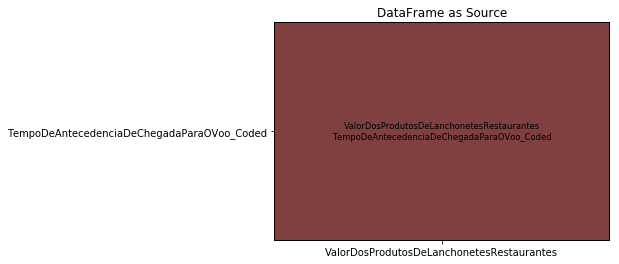

In [16]:
>>> tempo = ['TempoDeAntecedenciaDeChegadaParaOVoo_Coded']
>>> satisfaction = ['ValorDosProdutosDeLanchonetesRestaurantes']
>>> data = pd.DataFrame({'TempoDeAntecedenciaDeChegadaParaOVoo_Coded': tempo, 'ValorDosProdutosDeLanchonetesRestaurantes': satisfaction})
>>> mosaic(data, ['ValorDosProdutosDeLanchonetesRestaurantes', 'TempoDeAntecedenciaDeChegadaParaOVoo_Coded'], title='DataFrame as Source')
>>> plt.show()

In [17]:
indicadores = ['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']
for i in indicadores:
    data16 = {i:  newdf[i],
            'NomeAerodromo': newdf["NomeAerodromo"]}
    df16 = pd.DataFrame(data16)
    print('\n', i)
    grouped = df16.groupby('NomeAerodromo')
    print ((grouped[i].agg([np.mean])).to_string(formatters={'mean':'{:,.1f}'.format}))
    print(type(grouped[i].agg([np.mean])))


 QuantidadeEQualidadeDeLanchonetesRestaurantes
                                              mean
NomeAerodromo                                     
Aeroporto Internacional de Belém               3.6
Aeroporto Internacional de Brasília            3.5
Aeroporto Internacional de Confins             3.4
Aeroporto Internacional de Cuiabá              3.1
Aeroporto Internacional de Curitiba            3.6
Aeroporto Internacional de Florianópolis       3.9
Aeroporto Internacional de Fortaleza           3.7
Aeroporto Internacional de Maceió              3.7
Aeroporto Internacional de Manaus              3.2
Aeroporto Internacional de Natal               3.3
Aeroporto Internacional de Porto Alegre        3.6
Aeroporto Internacional de Recife              3.8
Aeroporto Internacional de Salvador            3.7
Aeroporto Internacional de São Paulo           3.4
Aeroporto Internacional de Viracopos/Campinas  3.4
Aeroporto Internacional do Rio de Janeiro      3.5
Aeroporto de Goiânia              

In [18]:
(newdf.groupby('NomeAerodromo').agg([np.mean])[['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']])

,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,CordialidadeDosFuncionariosDeLanchonetesRestaurantes,QuantidadeEQualidadeDeEstabelecimentosComerciais,ValorDosProdutosComerciais,TempoDeFilaNosEstabelecimentosComerciais,CordialidadeDosFuncionariosDoComercio
,mean,mean,mean,mean,mean,mean,mean,mean
NomeAerodromo,,,,,,,,
Aeroporto Internacional de Belém,3.614112,2.941292,NaN,NaN,3.912264,3.196926,NaN,NaN
Aeroporto Internacional de Brasília,3.544114,2.217860,3.731242,3.971873,3.329081,2.139717,3.925617,4.097428
Aeroporto Internacional de Confins,3.433665,2.264898,3.658805,3.980190,3.453861,2.537885,3.718250,3.995340
Aeroporto Internacional de Cuiabá,3.060293,2.356454,3.343062,3.537664,2.731682,2.477051,3.344477,3.367583
Aeroporto Internacional de Curitiba,3.646510,2.408671,4.090170,4.127422,3.750463,2.986671,4.205503,4.228070
Aeroporto Internacional de Florianópolis,3.891561,2.897716,NaN,NaN,3.907438,3.306897,NaN,NaN
Aeroporto Internacional de Fortaleza,3.704884,2.430349,3.937285,4.117490,3.730955,2.633718,4.015694,4.182559
Aeroporto Internacional de Maceió,3.693716,3.147311,NaN,NaN,3.938202,3.167243,NaN,NaN


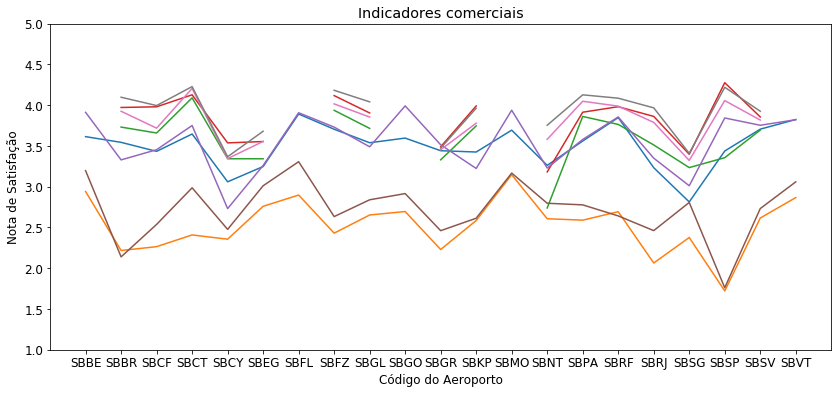

In [19]:
indicators = (newdf.groupby('IcaoAerodromo').agg([np.mean])[['QuantidadeEQualidadeDeLanchonetesRestaurantes',
       'ValorDosProdutosDeLanchonetesRestaurantes',
       'TempoDeFilaNasLanchonetesRestaurantes',
       'CordialidadeDosFuncionariosDeLanchonetesRestaurantes',
       'QuantidadeEQualidadeDeEstabelecimentosComerciais',
       'ValorDosProdutosComerciais',
       'TempoDeFilaNosEstabelecimentosComerciais',
       'CordialidadeDosFuncionariosDoComercio']])

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('Indicadores comerciais')
plt.xlabel('Código do Aeroporto')
plt.ylabel('Nota de Satisfação')
plt.ylim(1,5)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(indicators)


In [20]:
#Save the new dataframe
#mport sys
#newdf1.to_csv(sys.stdout, sep = '|')

In [21]:
grupodecontroleNaN = newdf1.loc[:,['TempoDeAntecedenciaDeChegadaParaOVoo_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaN = newdf1[grupodecontroleNaN.values]
grupodecontroleNaN

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
3,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,30min até 1h,FEMININO
5,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,NEGOCIO,1h30min até 2h,FEMININO
11,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,MASCULINO
12,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,FEMININO
15,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,2h30min até 3h,MASCULINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,30/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
grupoexperimental = newdf1.dropna(subset=['TempoDeAntecedenciaDeChegadaParaOVoo_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimental

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 a 5,NEGOCIO,30min até 1h,FEMININO
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,1h30min até 2h,MASCULINO
6,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,09/03/2019,GOL,Internacional,4.0,3.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,Mais de 3h,FEMININO
431824,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,3,NaN,É a primeira vez,É a primeira vez,LAZER,Mais de 3h,MASCULINO
431825,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,FEMININO
431828,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,30/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,MASCULINO


In [23]:
newdf2 = grupoexperimental
newdf2


,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 a 5,NEGOCIO,30min até 1h,FEMININO
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,1h30min até 2h,MASCULINO
6,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,09/03/2019,GOL,Internacional,4.0,3.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,Mais de 3h,FEMININO
431824,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,3,NaN,É a primeira vez,É a primeira vez,LAZER,Mais de 3h,MASCULINO
431825,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,FEMININO
431828,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,30/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,MASCULINO


### Analisando toda a amostra para os que consumiram ('ValorDosProdutosDeLanchonetesRestaurantes')

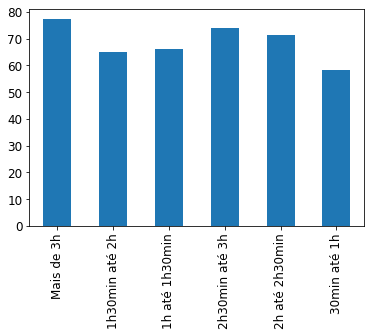

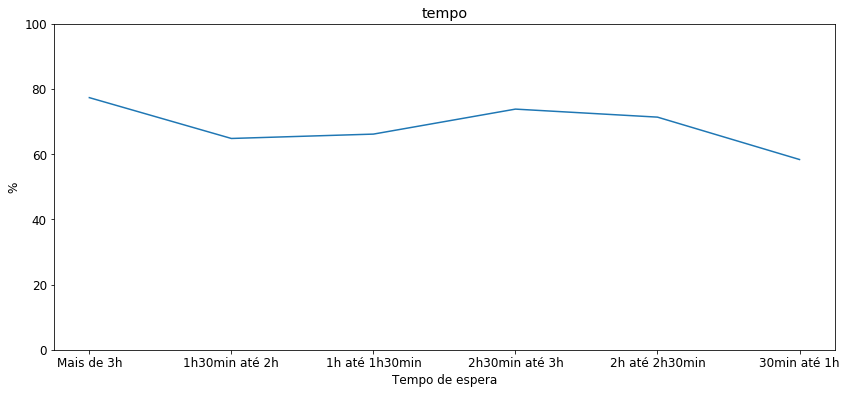

In [24]:
temp = (pd.value_counts(newdf2["TempoDeAntecedenciaDeChegadaParaOVoo_Coded"]))/temp2*100
temp.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('tempo')
plt.xlabel('Tempo de espera')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(temp)

In [25]:
grupodecontroleNaNmotivoviagem = newdf1.loc[:,['MotivoDaViagem_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNmotivoviagem = newdf1[grupodecontroleNaNmotivoviagem.values]
grupodecontroleNaNmotivoviagem

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
3,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,30min até 1h,FEMININO
5,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,NEGOCIO,1h30min até 2h,FEMININO
11,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,MASCULINO
12,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,FEMININO
15,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,2h30min até 3h,MASCULINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,30/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
grupoexperimentalmotivoviagem = newdf1.dropna(subset=['MotivoDaViagem_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalmotivoviagem

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 a 5,NEGOCIO,30min até 1h,FEMININO
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,1h30min até 2h,MASCULINO
6,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,09/03/2019,GOL,Internacional,4.0,3.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,Mais de 3h,FEMININO
431824,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,3,NaN,É a primeira vez,É a primeira vez,LAZER,Mais de 3h,MASCULINO
431825,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,FEMININO
431828,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,30/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,MASCULINO


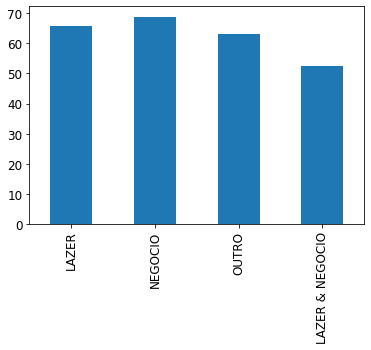

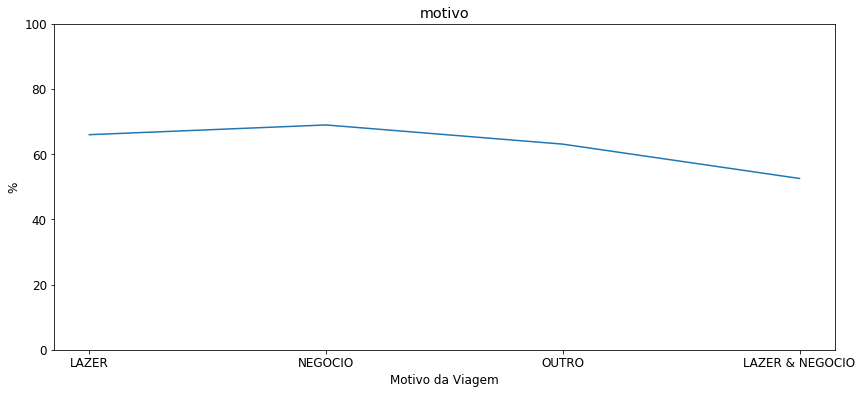

In [27]:
temp1 = (pd.value_counts(newdf2["MotivoDaViagem_Coded"]))/temp3*100
temp1.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('motivo')
plt.xlabel('Motivo da Viagem')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(temp1)

In [28]:
grupodecontroleNaNgender = newdf1.loc[:,['GeneroDoEntrevistado_Coded', 'ValorDosProdutosDeLanchonetesRestaurantes']].isnull().any(axis='columns')
grupodecontroleNaNgender = newdf1[grupodecontroleNaNgender.values]
grupodecontroleNaNgender

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
3,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,30min até 1h,FEMININO
5,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,NEGOCIO,1h30min até 2h,FEMININO
11,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,MASCULINO
12,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,30min até 1h,FEMININO
15,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,2h30min até 3h,MASCULINO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431839,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,23/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,1,30/03/2019,GOL,Internacional,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
grupoexperimentalgender = newdf1.dropna(subset=['GeneroDoEntrevistado_Coded','ValorDosProdutosDeLanchonetesRestaurantes'])
grupoexperimentalgender

,IcaoAerodromo,NomeAerodromo,Processo,Terminal,DataDaColeta,CiaAerea,TipoDeVoo,QuantidadeEQualidadeDeLanchonetesRestaurantes,ValorDosProdutosDeLanchonetesRestaurantes,TempoDeFilaNasLanchonetesRestaurantes,...,ProfissaoDoEntrevistado,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,MotivoDaViagem_Coded,TempoDeAntecedenciaDeChegadaParaOVoo_Coded,GeneroDoEntrevistado_Coded
0,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
1,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
2,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3 a 5,NEGOCIO,30min até 1h,FEMININO
4,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Mais de 5,LAZER,1h30min até 2h,MASCULINO
6,SBNT,Aeroporto Internacional de Natal,embarque,1,29/05/2013,GOL,Doméstico,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0 a 2,LAZER,1h30min até 2h,FEMININO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431823,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,09/03/2019,GOL,Internacional,4.0,3.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,Mais de 3h,FEMININO
431824,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,3,NaN,É a primeira vez,É a primeira vez,LAZER,Mais de 3h,MASCULINO
431825,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,16/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,FEMININO
431828,SBMO,Aeroporto Internacional de Maceió,EMBARQUE,1,30/03/2019,GOL,Internacional,5.0,5.0,NaN,...,NaN,Não Informou,N,1,NaN,2 a 3 vezes,É a primeira vez,LAZER,2h30min até 3h,MASCULINO


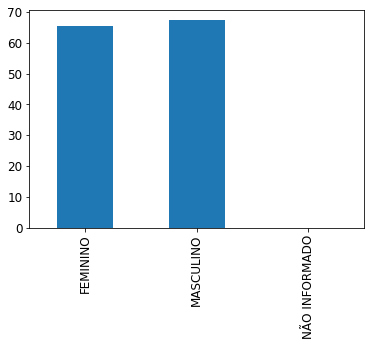

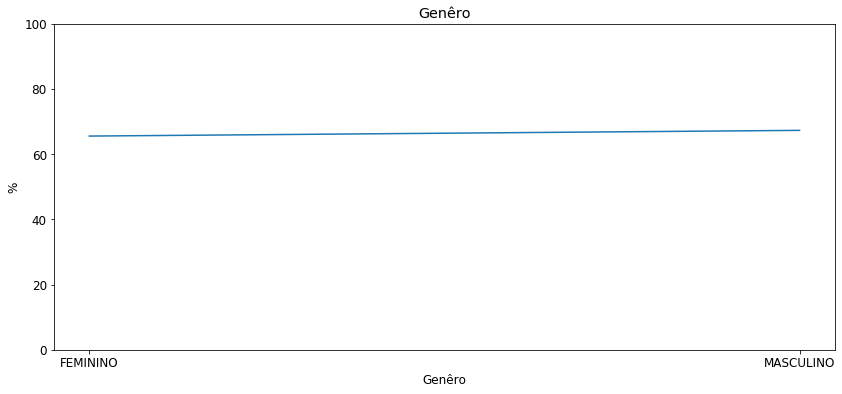

In [30]:
temp2 = (pd.value_counts(newdf2["GeneroDoEntrevistado_Coded"]))/temp4*100
temp2.plot.bar()

plt.figure(figsize=(14,6))
plt.rcParams.update({'font.size': 12})
plt.title('Genêro')
plt.xlabel('Genêro')
plt.ylabel('%')
plt.ylim(0,100)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.plot(temp2)

In [31]:
temp2 = (pd.value_counts(newdf2["GeneroDoEntrevistado_Coded"]))/temp4*100
temp2

FEMININO         65.528555
MASCULINO        67.277634
NÃO INFORMADO          NaN
Name: GeneroDoEntrevistado_Coded, dtype: float64